# Project 2: Bangkok House Pricing (Lasso Model)

# Import Library

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load Data

In [19]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\hp\Desktop\Truedigital\material\dsi-mymaterial\Projects\project_2\Redo


In [20]:
# Read file
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

In [21]:
# Read file replacement for subdistrict
subdist_df = pd.read_csv('../data/dist_subdist_replacement.csv')

In [22]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


In [23]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [24]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [25]:
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

# Data Cleaning

## Train Data & Test Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

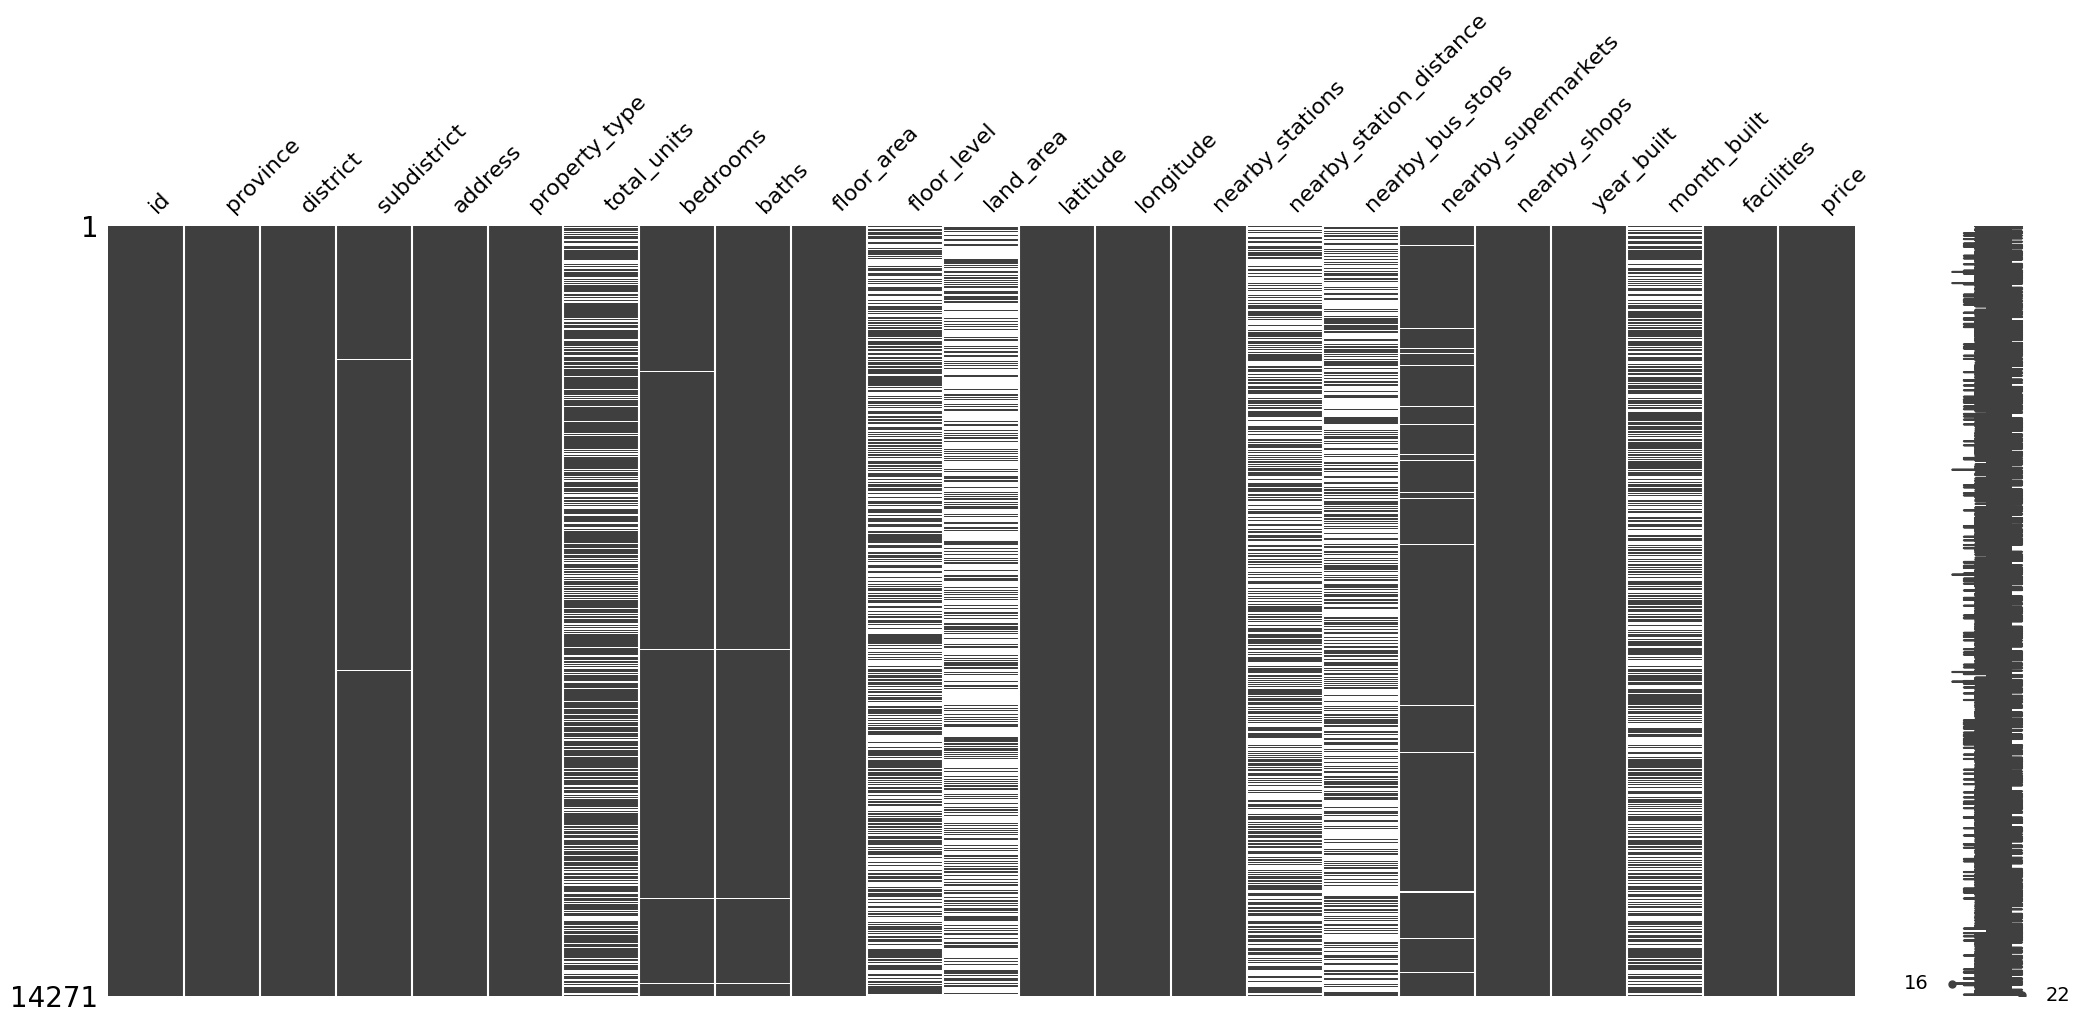

In [26]:
# Check missing values on train data
train_df.info()
msno.matrix(train_df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2500 non-null   int64  
 1   province                 2500 non-null   object 
 2   district                 2500 non-null   object 
 3   subdistrict              2497 non-null   object 
 4   address                  2500 non-null   object 
 5   property_type            2500 non-null   object 
 6   total_units              1858 non-null   float64
 7   bedrooms                 2490 non-null   float64
 8   baths                    2490 non-null   float64
 9   floor_area               2500 non-null   int64  
 10  floor_level              1401 non-null   float64
 11  land_area                841 non-null    float64
 12  latitude                 2500 non-null   float64
 13  longitude                2500 non-null   float64
 14  nearby_stations         

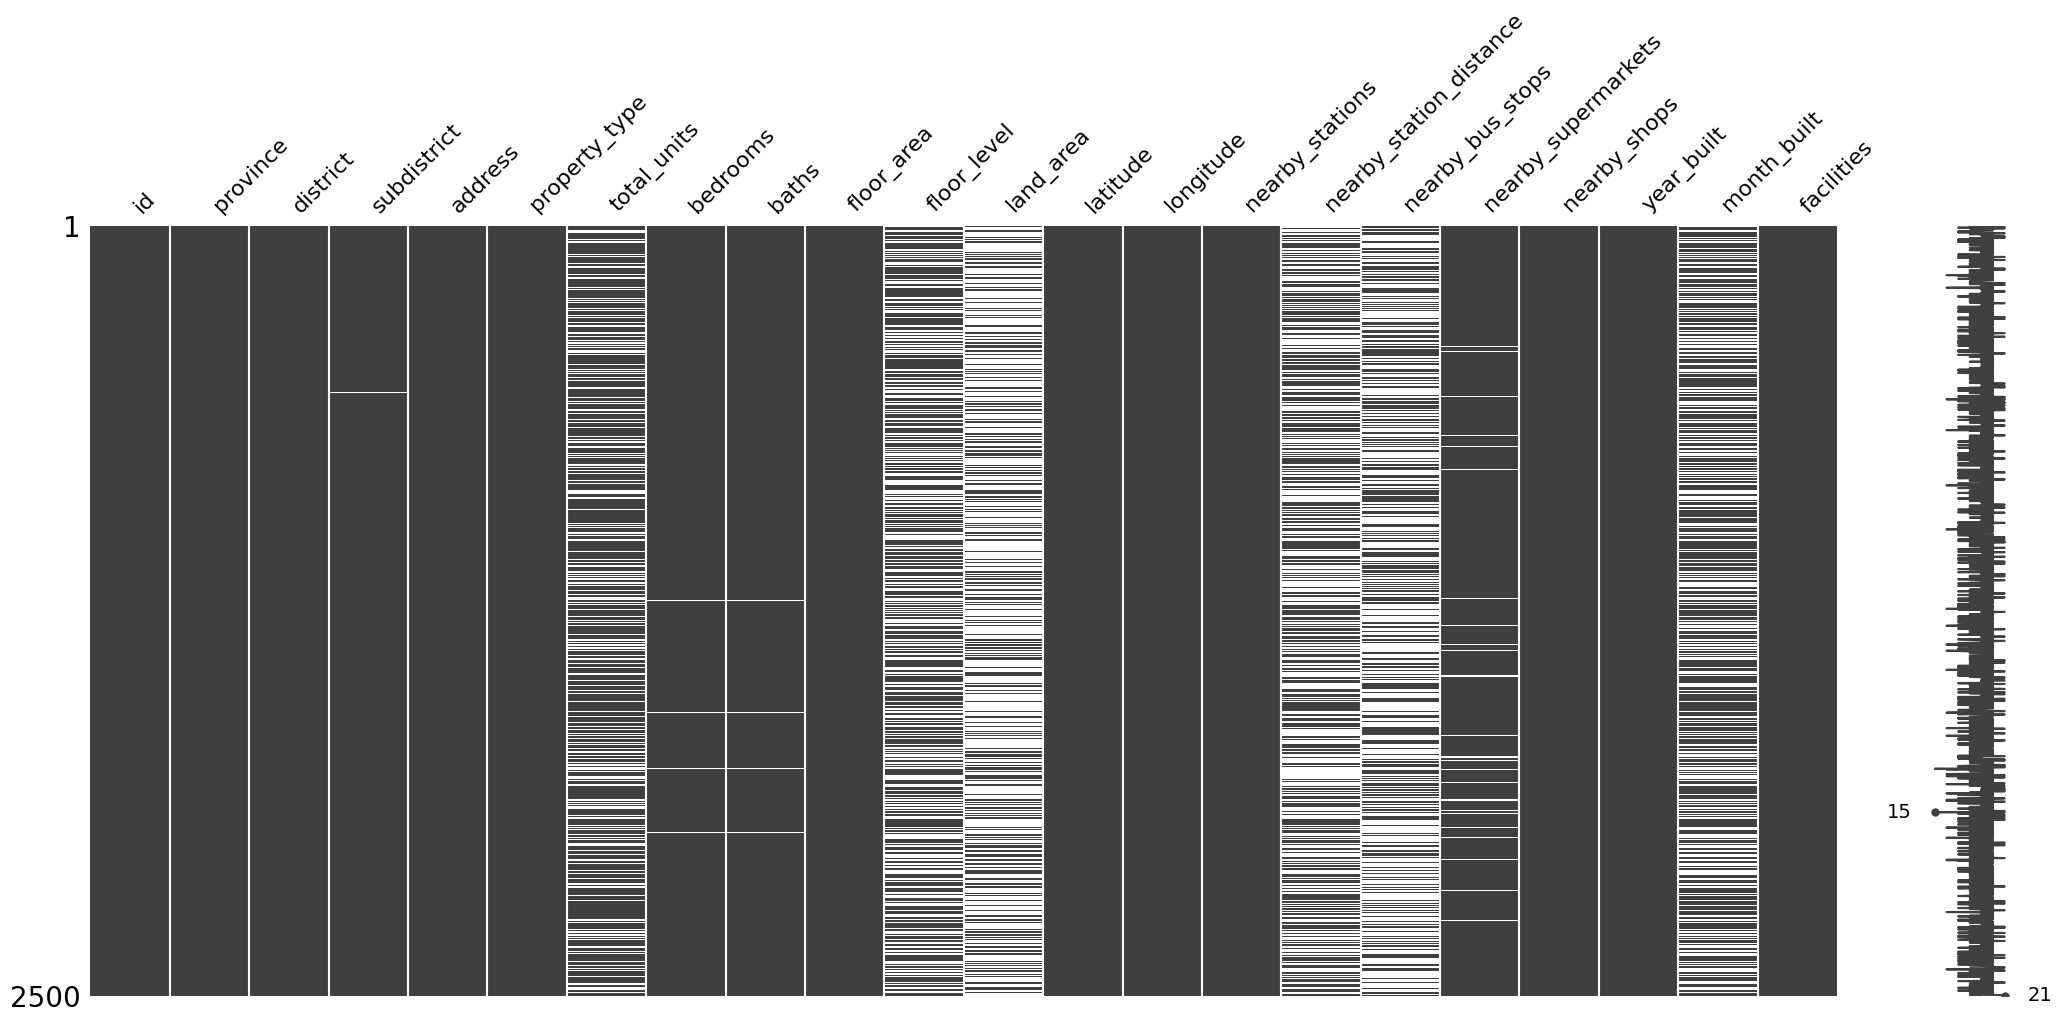

In [27]:
# Check missing values on test data
test_df.info()
msno.matrix(test_df);

In [28]:
# Check what kind of values in 'total_units' column
train_df['total_units'].unique()
train_df['total_units']

0        273.0
1         74.0
2        940.0
3          NaN
4          NaN
         ...  
14266    648.0
14267      NaN
14268    300.0
14269      NaN
14270    365.0
Name: total_units, Length: 14271, dtype: float64

In [29]:
# Use KNNImputer to fill missing values
# To use this method because I would like to spread distribution of total_units

imputer = KNNImputer(add_indicator=True)
train_df['total_units'] = imputer.fit_transform(train_df[['total_units']]).round()
test_df['total_units'] = imputer.fit_transform(test_df[['total_units']]).round()

In [30]:
train_df['total_units']

0        273.0
1         74.0
2        940.0
3        713.0
4        713.0
         ...  
14266    648.0
14267    713.0
14268    300.0
14269    713.0
14270    365.0
Name: total_units, Length: 14271, dtype: float64

In [31]:
# Fill missing values in 'bedrooms' column
train_df['bedrooms'] = imputer.fit_transform(train_df[['bedrooms']]).round()
test_df['bedrooms'] = imputer.fit_transform(test_df[['bedrooms']]).round()

In [32]:
# Fill missing values in 'baths' column
train_df['baths'] = imputer.fit_transform(train_df[['baths']]).round()
test_df['baths'] = imputer.fit_transform(test_df[['baths']]).round()

In [33]:
# Fill missing values in 'floor_level' column
train_df['floor_level'] = imputer.fit_transform(train_df[['floor_level']]).round()
test_df['floor_level'] = imputer.fit_transform(test_df[['floor_level']]).round()

In [34]:
# Fill missing values in 'land_area' column
train_df['land_area'] = imputer.fit_transform(train_df[['land_area']])
test_df['land_area'] = imputer.fit_transform(test_df[['land_area']])

In [35]:
# DV
# Justify the decision for using the above methods for filling NA
# Answer: I justified above

In [36]:
# Use fillna 'Unknown' because there are many missvalue and I'm not sure what property near station exactly and take times to survey more data
train_df['nearby_station_distance'] = train_df['nearby_station_distance'].fillna('Unknown')
test_df['nearby_station_distance'] = test_df['nearby_station_distance'].fillna('Unknown')

In [37]:
# Fill missing values in 'nearby_bus_stop' column with mean
train_df['nearby_bus_stops'] = imputer.fit_transform(train_df[['nearby_bus_stops']])
test_df['nearby_bus_stops'] = imputer.fit_transform(test_df[['nearby_bus_stops']])

In [38]:
# DV
# Doesnt it make sense to mae number of bus stops 0 instead of interpolate using linear?
# No, I changed to SimpleImputer
# DV -- can you explain what this code does?
'''test_df.iloc[:1] = test_df.iloc[:1].fillna(test_df.mean(numeric_only=True)).round()
test_df['nearby_bus_stops'].head(30)'''
# I used SimpleImputer instead

"test_df.iloc[:1] = test_df.iloc[:1].fillna(test_df.mean(numeric_only=True)).round()\ntest_df['nearby_bus_stops'].head(30)"

In [39]:
# Fill missing value in 'nearby_supermarkets' column with mean
# because there are many missvalue and I'm not sure what property near supermarket exactly and take times to survey more data
train_df['nearby_supermarkets'] = imputer.fit_transform(train_df[['nearby_supermarkets']])
test_df['nearby_supermarkets'] = imputer.fit_transform(test_df[['nearby_supermarkets']])

In [40]:
import random
# DV
# Why randomly filling months?
# Because I think if I use most_frequent on imputer. The distribution will be bias to the most frequent month

# Sample DataFrame with missing values and existing values
data = {'month_built': ['June', 'September', None, 'December', None]}
train_df = pd.DataFrame(train_df)

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a mask for missing values
missing_values = train_df['month_built'].isnull()

# Randomly fill the missing values
train_df.loc[missing_values, 'month_built'] = random.choices(months, k=missing_values.sum())

print(train_df['month_built'])

0             June
1        September
2          January
3         November
4         December
           ...    
14266       August
14267       August
14268      January
14269        March
14270         June
Name: month_built, Length: 14271, dtype: object


In [41]:
# Sample DataFrame with missing values and existing values
data = {'month_built': ['June', 'September', None, 'December', None]}
test_df = pd.DataFrame(test_df)

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a mask for missing values
missing_values = test_df['month_built'].isnull()

# Randomly fill the missing values
test_df.loc[missing_values, 'month_built'] = random.choices(months, k=missing_values.sum())

print(test_df['month_built'])

0        December
1        December
2       September
3            June
4       September
          ...    
2495    September
2496         July
2497      January
2498     December
2499     February
Name: month_built, Length: 2500, dtype: object


In [42]:
# To check null value on subdistrict column
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Create a mask for missing values
missing_values_mask = train_df['subdistrict'].isnull()

# List rows with missing values in the 'subdistrict' column
rows_with_missing_values = train_df[missing_values_mask]

# Display rows with missing values
print(rows_with_missing_values)

             id province      district subdistrict  \
2474   10605666  Bangkok        Sathon        None   
2933   10605671  Bangkok        Sathon        None   
3082   10991002  Bangkok     Chatuchak        None   
5174   10781084  Bangkok  Phra Khanong        None   
6428   10921491  Bangkok  Phra Khanong        None   
8084   10605667  Bangkok        Sathon        None   
8229   10605669  Bangkok        Sathon        None   
8238   10611824  Bangkok        Sathon        None   
9816   10918742  Bangkok        Sathon        None   
10528  10559917  Bangkok  Phra Khanong        None   
11749  10605664  Bangkok        Sathon        None   

                                                 address property_type  \
2474          ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
2933          ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
3082                   92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1)         Condo   
5174   ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห..

In [43]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 3082  # Index of the row to fill
value_to_fill = 'Sena Nikhom'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [44]:
# To check correctly replaced on subdistrict column
row_index = 3082

# Using .loc to access the specific row
row_3082 = train_df.loc[row_index]
print(row_3082)

id                                                                  10991002
province                                                             Bangkok
district                                                           Chatuchak
subdistrict                                                      Sena Nikhom
address                                    92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1)
property_type                                                          Condo
total_units                                                             78.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                28
floor_level                                                              7.0
land_area                                                         242.963596
latitude                                                           13.833285

In [45]:
# Fill missing values in 'subdistrict' column which this three property is in Bang Chak subdistrict
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 5174, 6428, 10528  # Index of the row to fill
value_to_fill = 'Bang Chak'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [46]:
# Specify the row indices you want to check (e.g., rows 2 and 4)
row_indices_to_check = [5174, 6428, 10528]

# Define the values to fill in the specified rows
values_to_fill = ['Bang Chak']

# Check and display the specified rows
for row_index in row_indices_to_check:
    row_data = train_df.loc[row_index]
    print(f"Row {row_index}:")
    print(row_data)

Row 5174:
id                                                                  10781084
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                43
floor_level                                                              4.0
land_area                                                         242.963596
latitude                                                          

In [47]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 2474, 2933, 8084, 8229, 8238, 9816, 11749 # Index of the row to fill
value_to_fill = 'Thung Maha Mek'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [48]:
# Specify the row indices you want to check (e.g., rows 2 and 4)
row_indices_to_check = [2474, 2933, 8084, 8229, 8238, 9816, 11749]

# Define the values to fill in the specified rows
values_to_fill = ['Thung Maha Mek']

# Check and display the specified rows
for row_index in row_indices_to_check:
    row_data = train_df.loc[row_index]
    print(f"Row {row_index}:")
    print(row_data)

Row 2474:
id                                                                  10605666
province                                                             Bangkok
district                                                              Sathon
subdistrict                                                   Thung Maha Mek
address                           ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
property_type                                                          Condo
total_units                                                            361.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                39
floor_level                                                             11.0
land_area                                                         242.963596
latitude                                                          

In [49]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Create a mask for missing values
missing_values_mask = test_df['subdistrict'].isnull()

# List rows with missing values in the 'subdistrict' column
rows_with_missing_values = test_df[missing_values_mask]

# Display rows with missing values
print(rows_with_missing_values)

            id province      district subdistrict  \
540    8476937  Bangkok  Phra Khanong        None   
1448  10605668  Bangkok        Sathon        None   
1993  10841475  Bangkok  Phra Khanong        None   

                                                address property_type  \
540   ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...         Condo   
1448         ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
1993  ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...         Condo   

      total_units  bedrooms  baths  floor_area  ...   latitude   longitude  \
540          79.0       1.0    1.0          46  ...  13.689652  100.606867   
1448        361.0       2.0    2.0          66  ...  13.717888  100.532691   
1993         79.0       1.0    2.0          74  ...  13.689652  100.606867   

      nearby_stations                            nearby_station_distance  \
540                 2  [[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...   
1448                3  [[B2 A

In [50]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Replace the missing value in a specific row with a known value
row_index = 540, 1993  # Index of the row to fill
value_to_fill = 'Bang Chak'  # Value to fill in the specified row

test_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [51]:
# Specify the row indices you want to check (e.g., rows 2 and 4)
row_indices_to_check = [540, 1993]

# Define the values to fill in the specified rows
values_to_fill = ['Bang Chak']
# Check and display the specified rows
for row_index in row_indices_to_check:
    row_data = test_df.loc[row_index]
    print(f"Row {row_index}:")
    print(row_data)

Row 540:
id                                                                   8476937
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                46
floor_level                                                             11.0
land_area                                                         151.491082
latitude                                                           

In [52]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Replace the missing value in a specific row with a known value
row_index = 1448 # Index of the row to fill
value_to_fill = 'Thung Maha Mek'  # Value to fill in the specified row

test_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [53]:
row_index = 1448

# Using .loc to access the specific row
row_1448 = test_df.loc[row_index]
print(row_1448)

id                                                                  10605668
province                                                             Bangkok
district                                                              Sathon
subdistrict                                                   Thung Maha Mek
address                           ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
property_type                                                          Condo
total_units                                                            361.0
bedrooms                                                                 2.0
baths                                                                    2.0
floor_area                                                                66
floor_level                                                             11.0
land_area                                                         151.491082
latitude                                                           13.717888

In [54]:
# Check corrected value on subdistrict column
train_df['subdistrict'].unique()

array(['Phra Khanong Nuea', 'Khlong Toei Nuea', 'Khlong Tan',
       'Bang Khun Kong', 'Bang Phai', 'Si Phraya', 'Pak Kret', 'Sai Mai',
       'Khlong Tan Nuea', 'Lumphini', 'Lat Yao', 'Thepharak', 'Dok Mai',
       'Phimon Rat', 'Chom Phon', 'Huai Khwang', 'Bang Chak',
       'Suan Luang', 'Wat Tha Phra', 'Nuan Chan', 'Khlong Kum',
       'Khlong Chan', 'Phra Khanong', 'Bang Khen', 'Nong Khaem',
       'Samrong Nuea', 'Bang Pla', 'Ram Inthra',
       'Nai Khlong Bang Pla Kot', 'Bang Rak Phatthana', 'Bang Kaeo',
       'Bang Len', 'Pak Nam', 'Sao Thong Hin', 'Sam Sen Nai',
       'Sena Nikhom', 'Sisa Chorakhe Noi', 'Saphan Sung', 'O Ngoen',
       'Maha Sawat', 'Khlong Kluea', 'Din Daeng', 'Si Kan',
       'Nong Khang Phlu', 'Makkasan', 'Bang Khu Rat', 'Bukkhalo',
       'Talat Khwan', 'Noble Revolve Ratchada', 'Bang Yi Khan',
       'Saen Saep', 'Bang Kraso', 'Thung Song Hong', 'Bang Chan',
       'Plai Bang', 'Bang Bua Thong', 'Chong Nonsi', 'Vio Khaerai 2',
       'Bang Phlap', 'Sai

In [55]:
matches = train_df['subdistrict'].str.contains('The ')

# Display rows with 'The' in 'subdistrict' column
result = train_df[matches]
print(result)

             id province      district                     subdistrict  \
244    11019179  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
300     5165252  Bangkok      Watthana         The Alcove Sukhumvit 49   
305    10916770  Bangkok     Din Daeng              The Kris Express 2   
315    10231728  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
662     7433797  Bangkok      Watthana          The Bloom Sukhumvit 71   
748    10855854  Bangkok      Watthana         The Alcove Sukhumvit 49   
1453   10301096  Bangkok      Watthana          The Bloom Sukhumvit 71   
1502   10879957  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
2079   10960944  Bangkok      Watthana          The Bloom Sukhumvit 71   
3109   10071002  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
3427   10965719  Bangkok     Din Daeng                The Kris Extra 5   
4533   10985459  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
5955   10562009  Bangkok   Ratchathewi

In [56]:
# Define a mapping of values to replace
replace_dict = {'The Kris Express 2':'Din Daeng', 'The Kris Extra 5':'Din Daeng', 'The Mark Ratchada-Airport Link':'Makkasan', 
                'The Alcove Sukhumvit 49':'Khlong Tan Nuea', 'The Bloom Sukhumvit 71':'Phra Khanong Nuea',
                'Whizdom The Exclusive':'Bang Chak', 'Sathorn Happy Land': 'Khlong Chan', 'StarView Rama 3':'Bang Khlo', 
                'Smart Condo Rama 2':'Samae Dam', 'ASHTON Silom':'Suriyawong', 'M Silom':'Suriyawong', 
                'IDEO Thaphra Interchange':'Wat Tha Phra', 'Supalai Park Ratchayothin':'Lat Yao', 
                'Lumpini Suite Dindaeng-Ratchaprarop':'Din Daeng', 'Chateau In Town Ratchada 20':'Sam Sen Nok', 
                'Noble Revolve Ratchada':'Huai Khwang', 'Villa Sathorn':'Khlong Ton Sai', 'Plum Condo Chaengwattana Station':'Talat Bang Khen', 
                'CU Terrace':'Wang Mai', 'Life Asoke - Rama 9':'Makkasan', 'Baan Nonsi':'Thung Wat Don', 
                'Beverly Tower':'Khlong Toei Nuea', 'Supalai Premier Ratchada-Narathiwas-Sathorn':'Chong Nonsi', 
                'Vio Khaerai 2':'Talat Khwan', 'DOUBLELAKE เมืองทองธานี CONDOMINIUM':'Ban Mai', 'NUE Noble Chaengwattana':'Bang Talat',
                'Baan Suanthon Srinakarin condominium':'Bang Kaeo', 'Kensington Condominium':'Samrong Nuea',
                'Nara 9 Sathorn-Narathiwas':'Thung Maha Mek'}

# Replace values in the 'Color' column
train_df['subdistrict'] = train_df['subdistrict'].replace(replace_dict)

# Display the DataFrame with values replaced
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [57]:
# DV
# Why are some subdistricts filled one row at a time and some are done using dictionary?
# The reason is subdistrict which has one row, it is only one property name, and the other subdistricts which have many rows, I filled by using dictionary

In [58]:
# Check the corrected value on subdistrict column
matches = train_df['subdistrict'].str.contains('The ')

# Display rows with 'The' in 'subdistrict' column
result = train_df[matches]
print(result)

Empty DataFrame
Columns: [id, province, district, subdistrict, address, property_type, total_units, bedrooms, baths, floor_area, floor_level, land_area, latitude, longitude, nearby_stations, nearby_station_distance, nearby_bus_stops, nearby_supermarkets, nearby_shops, year_built, month_built, facilities, price]
Index: []

[0 rows x 23 columns]


In [59]:
test_df['subdistrict'].unique()

array(['Bang Phli Yai', 'Nong Khang Phlu', 'Huai Khwang', 'Khlong Tan',
       'Thung Song Hong', 'Bang Mot', 'Bang Kapi', 'Pak Nam', 'Bang Sue',
       'Din Daeng', 'Khlong Tan Nuea', 'Bang Khen', 'Sam Sen Nok',
       'Thepharak', 'O Ngoen', 'Samrong Nuea', 'Racha Thewa',
       'Sam Wa Tawan Tok', 'Thanon Phetchaburi', 'Thung Wat Don',
       'Sao Thong Hin', 'Anusawari', 'Maha Phruettharam',
       'Phra Khanong Nuea', 'Phra Khanong', 'Sam Sen Nai', 'Bang Na',
       'Hua Mak', 'Lat Phrao', 'Bang Kraso', 'Thung Maha Mek',
       'Bang Muang', 'Bang Phai', 'Phraek Sa Mai',
       'IDEO Thaphra Interchange', 'Wang Thonglang', 'Phraek Sa',
       'Khlong Toei Nuea', 'Thap Yao', 'Bang Chak', 'Thung Khru',
       'Rong Mueang', 'Sai Ma', 'Prawet', 'Taling Chan', 'Bukkhalo',
       'Makkasan', 'Sena Nikhom', 'Nawamin', 'Maha Sawat', 'Bang Khae',
       'Ban Mai', 'Chong Nonsi', 'Saphan Sung', 'Suan Luang', 'Tha Kham',
       'Bang Khu Rat', 'Talat Khwan', 'Bang Khun Si', 'Bang Kaeo',
   

In [60]:
test_replace_dict = {'The Kris Express 2':'Din Daeng', 'The Kris Extra 5':'Din Daeng', 'The Mark Ratchada-Airport Link':'Makkasan', 
                     'The Alcove Sukhumvit 49':'Khlong Tan Nuea', 'The Bloom Sukhumvit 71':'Phra Khanong Nuea',
                     'Whizdom The Exclusive':'Bang Chak', 'Sathorn Happy Land': 'Khlong Chan', 'StarView Rama 3':'Bang Khlo', 
                     'Smart Condo Rama 2':'Samae Dam', 'ASHTON Silom':'Suriyawong', 'M Silom':'Suriyawong', 
                     'IDEO Thaphra Interchange':'Wat Tha Phra', 'Supalai Park Ratchayothin':'Lat Yao', 
                     'Lumpini Suite Dindaeng-Ratchaprarop':'Din Daeng', 'Chateau In Town Ratchada 20':'Sam Sen Nok', 
                     'Noble Revolve Ratchada':'Huai Khwang', 'Villa Sathorn':'Khlong Ton Sai', 
                     'Plum Condo Chaengwattana Station':'Talat Bang Khen', 'CU Terrace':'Wang Mai', 'Life Asoke - Rama 9':'Makkasan', 
                     'Baan Nonsi':'Thung Wat Don', 'Beverly Tower':'Khlong Toei Nuea', 'Supalai Premier Ratchada-Narathiwas-Sathorn':'Chong Nonsi', 
                     'Vio Khaerai 2':'Talat Khwan', 'DOUBLELAKE เมืองทองธานี CONDOMINIUM':'Ban Mai', 'NUE Noble Chaengwattana':'Bang Talat',
                     'Baan Suanthon Srinakarin condominium':'Bang Kaeo', 'Kensington Condominium':'Samrong Nuea',
                     'Nara 9 Sathorn-Narathiwas':'Thung Maha Mek'}

# Replace values in the 'Color' column
test_df['subdistrict'] = test_df['subdistrict'].replace(test_replace_dict)

# Display the DataFrame with values replaced
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [61]:
test_df['subdistrict'].unique()

array(['Bang Phli Yai', 'Nong Khang Phlu', 'Huai Khwang', 'Khlong Tan',
       'Thung Song Hong', 'Bang Mot', 'Bang Kapi', 'Pak Nam', 'Bang Sue',
       'Din Daeng', 'Khlong Tan Nuea', 'Bang Khen', 'Sam Sen Nok',
       'Thepharak', 'O Ngoen', 'Samrong Nuea', 'Racha Thewa',
       'Sam Wa Tawan Tok', 'Thanon Phetchaburi', 'Thung Wat Don',
       'Sao Thong Hin', 'Anusawari', 'Maha Phruettharam',
       'Phra Khanong Nuea', 'Phra Khanong', 'Sam Sen Nai', 'Bang Na',
       'Hua Mak', 'Lat Phrao', 'Bang Kraso', 'Thung Maha Mek',
       'Bang Muang', 'Bang Phai', 'Phraek Sa Mai', 'Wat Tha Phra',
       'Wang Thonglang', 'Phraek Sa', 'Khlong Toei Nuea', 'Thap Yao',
       'Bang Chak', 'Thung Khru', 'Rong Mueang', 'Sai Ma', 'Prawet',
       'Taling Chan', 'Bukkhalo', 'Makkasan', 'Sena Nikhom', 'Nawamin',
       'Maha Sawat', 'Bang Khae', 'Ban Mai', 'Chong Nonsi', 'Saphan Sung',
       'Suan Luang', 'Tha Kham', 'Bang Khu Rat', 'Talat Khwan',
       'Bang Khun Si', 'Bang Kaeo', 'Chom Phon', 'B

In [62]:
# Replace from 0 to any value in 'year_built' column
train_df['year_built'] = train_df['year_built'].replace(0, np.nan)
test_df['year_built'] = test_df['year_built'].replace(0, np.nan)

# Fill missing values in 'year_built' column with mean
train_df['year_built'] = imputer.fit_transform(train_df[['year_built']]).round()
test_df['year_built'] = imputer.fit_transform(test_df[['year_built']]).round()

In [63]:
# Change 'year_built' column to int
train_df['year_built'] = train_df['year_built'].astype(int)
test_df['year_built'] = test_df['year_built'].astype(int)

# Exploratory Data Analysis

#### target value : `price`

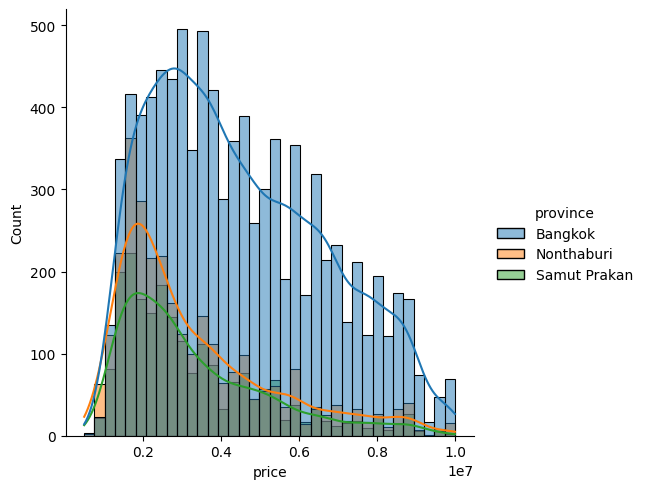

In [64]:
sns.displot(x="price", hue='province', kde=True, data=train_df);
# According to the graph, I found that the price in Bangkok is higher than other provinces.
# The number of price range from 2,000,000 to 4,000,000 baht are many in Bangkok.
# Then, the graph is slightly skewed to the right.

In [65]:
train_df.groupby('province')['price'].mean()

province
Bangkok         4.468327e+06
Nonthaburi      3.284407e+06
Samut Prakan    3.299485e+06
Name: price, dtype: float64

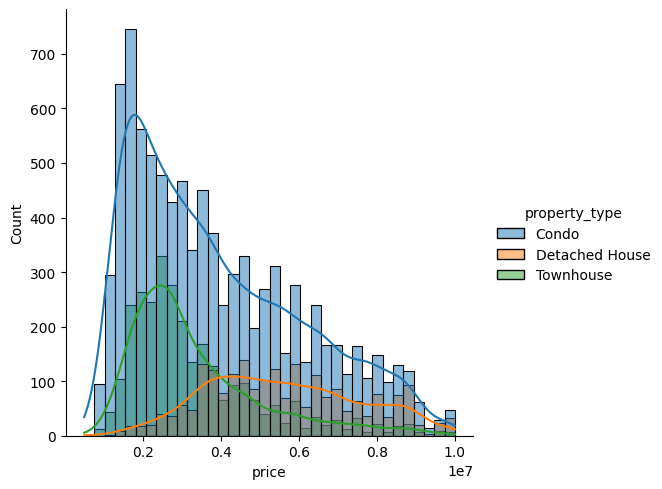

In [66]:
# Check selected features `price`, `property_type`
sns.displot(x="price", hue='property_type', kde=True, data=train_df);

# According to the graph, I found that the price of condo is higher than other property types.
# The number of price range approximately from 1,000,000 to 2,000,000 baht are many in condo.
# Then, the graph is slightly skewed to the right.

In [67]:
train_df.groupby('property_type')['price'].mean()

property_type
Condo             3.911505e+06
Detached House    5.578554e+06
Townhouse         3.316470e+06
Name: price, dtype: float64

## Boxplot Selected Features

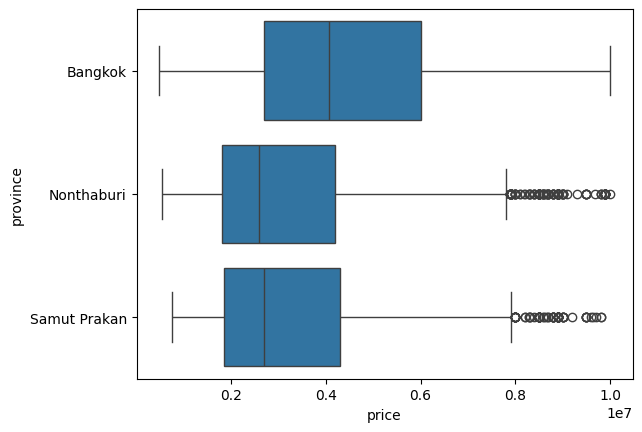

In [68]:
# Distribution 
sns.boxplot(data = train_df, x='price', y='province');

# The box plot graph shows the outlier in Nonthaburi province which has many outliers follow by Samut Prakan.

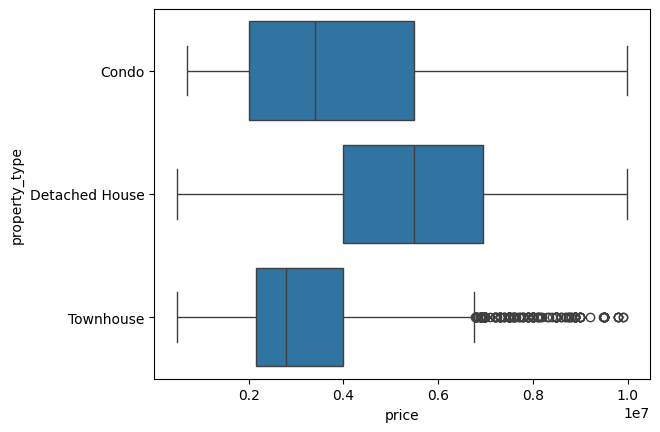

In [69]:
sns.boxplot(data = train_df, x='price', y='property_type');

# The box plot graph shows the outlier by price which shows only townhouse which has many outliers.

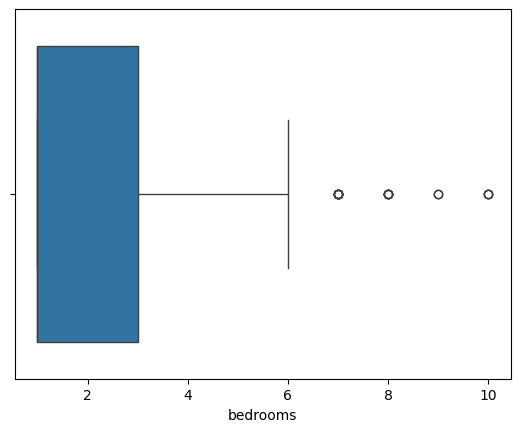

In [70]:
sns.boxplot(x=train_df['bedrooms']);

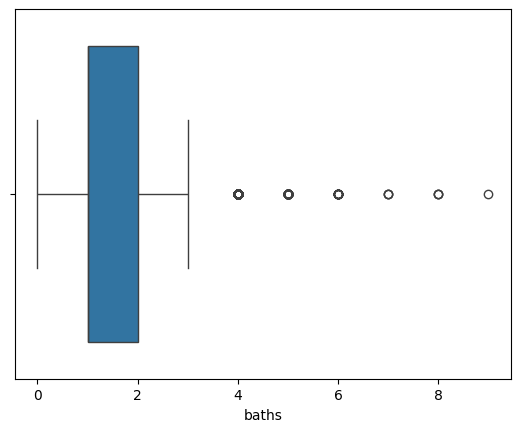

In [71]:
sns.boxplot(x=train_df['baths']);

In [72]:
# Identify the columns you want to clean
columns_to_clean = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets']

# Define a function to remove outliers using z-scores
def remove_outliers(train_df, column_name, z_threshold=3):
    z_scores = (train_df[column_name] - train_df[column_name].mean()) / train_df[column_name].std()
    filtered_df = train_df[(z_scores < z_threshold) & (z_scores > -z_threshold)]
    return filtered_df

# Iterate through the specified columns and remove outliers
for column_name in columns_to_clean:
    train_df = remove_outliers(train_df, column_name)

In [73]:
# Replace the 'year_built' column with random integers
replacement_year = 2000
train_df['year_built'] = train_df['year_built'].replace(0, replacement_year)
train_df['year_built'].unique()

array([2011, 2012, 2017, 2015, 2014, 2010, 2004, 2018, 2023, 2016, 2019,
       1994, 2013, 2022, 2009, 2021, 2020, 2007, 1993, 2008, 2006, 2002,
       2005, 1995, 1998, 1996, 2000, 2003, 1999, 1992, 1997, 1991, 2001,
       1988])

In [74]:
train_df['floor_level'] = train_df['floor_level'].replace(0, 1)
train_df['floor_level'].unique()

array([10.,  8.,  4., 11.,  6., 12.,  2., 24.,  5., 16., 14., 18., 15.,
       21.,  3., 17.,  7., 25., 29., 26., 22.,  9., 31., 20., 19., 27.,
        1., 13., 30., 23., 28.])

#### Horizontal Bar Chart: `property_type` and `province`

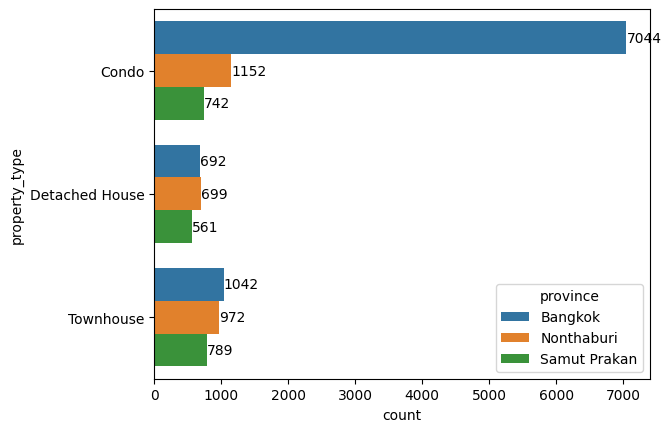

In [75]:
ax = sns.countplot(y='property_type', hue='province', data=train_df)
for i in range(3):
    ax.bar_label(ax.containers[i])

# Correlation Matrices

In [76]:
train_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
id,1.000000,-0.014614,0.042419,0.021582,0.033243,-0.023469,-0.067067,0.015760,-0.008652,-0.069821,0.015960,-0.033559,-0.058276,0.015243,-0.052895
total_units,-0.014614,1.000000,-0.154466,-0.159033,-0.167771,0.165801,0.092614,0.047758,-0.046916,0.017187,-0.040631,-0.040342,-0.027835,0.035619,-0.249891
bedrooms,0.042419,-0.154466,1.000000,0.846979,0.842437,-0.110850,-0.435591,0.104163,0.021218,-0.489892,0.151194,-0.396191,-0.484182,0.046348,0.219909
baths,0.021582,-0.159033,0.846979,1.000000,0.842361,-0.108699,-0.385339,0.089867,0.041890,-0.449122,0.141244,-0.349300,-0.425398,0.036559,0.305439
floor_area,0.033243,-0.167771,0.842437,0.842361,1.000000,-0.104655,-0.305885,0.103955,0.042438,-0.450853,0.147079,-0.353734,-0.426330,0.001813,0.328976
floor_level,-0.023469,0.165801,-0.110850,-0.108699,-0.104655,1.000000,0.070289,-0.016651,-0.080406,0.209035,-0.036763,0.073446,0.127727,0.063481,0.143172
land_area,-0.067067,0.092614,-0.435591,-0.385339,-0.305885,0.070289,1.000000,-0.047238,-0.002527,0.318805,-0.059286,0.241521,0.303863,-0.056684,0.196267
latitude,0.015760,0.047758,0.104163,0.089867,0.103955,-0.016651,-0.047238,1.000000,-0.430913,-0.061262,0.006941,-0.127804,-0.116483,0.014085,-0.056736
longitude,-0.008652,-0.046916,0.021218,0.041890,0.042438,-0.080406,-0.002527,-0.430913,1.000000,-0.146109,0.021728,-0.008212,-0.038912,-0.005811,0.037399
nearby_stations,-0.069821,0.017187,-0.489892,-0.449122,-0.450853,0.209035,0.318805,-0.061262,-0.146109,1.000000,-0.138086,0.408774,0.563862,-0.002760,0.255234


<Axes: >

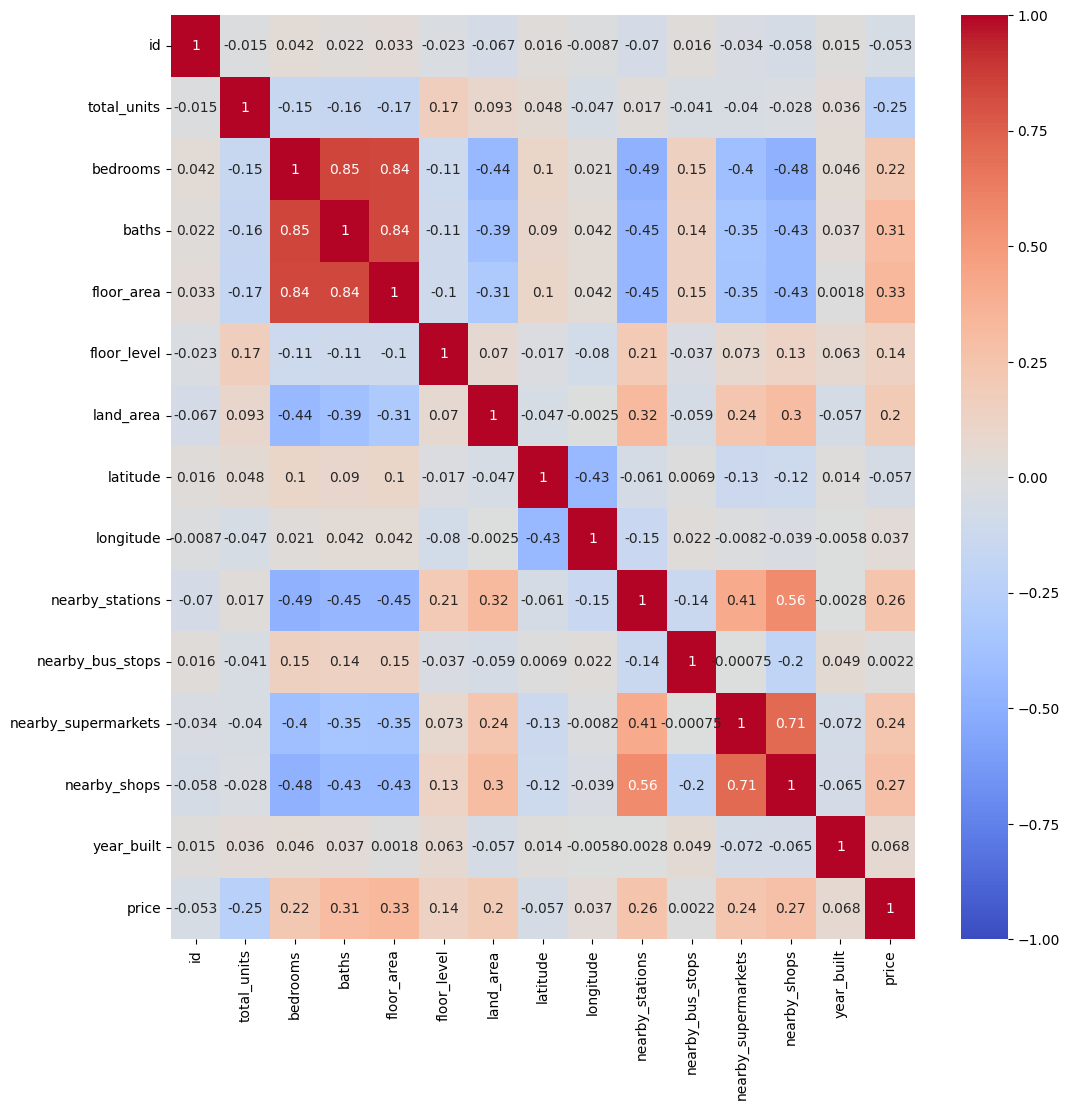

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

## Distribution

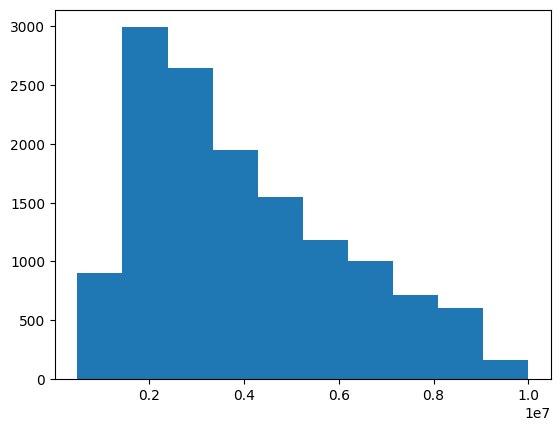

In [78]:
plt.hist(train_df['price']);

In [79]:
np.mean(train_df['price'])

3970158.6782297525

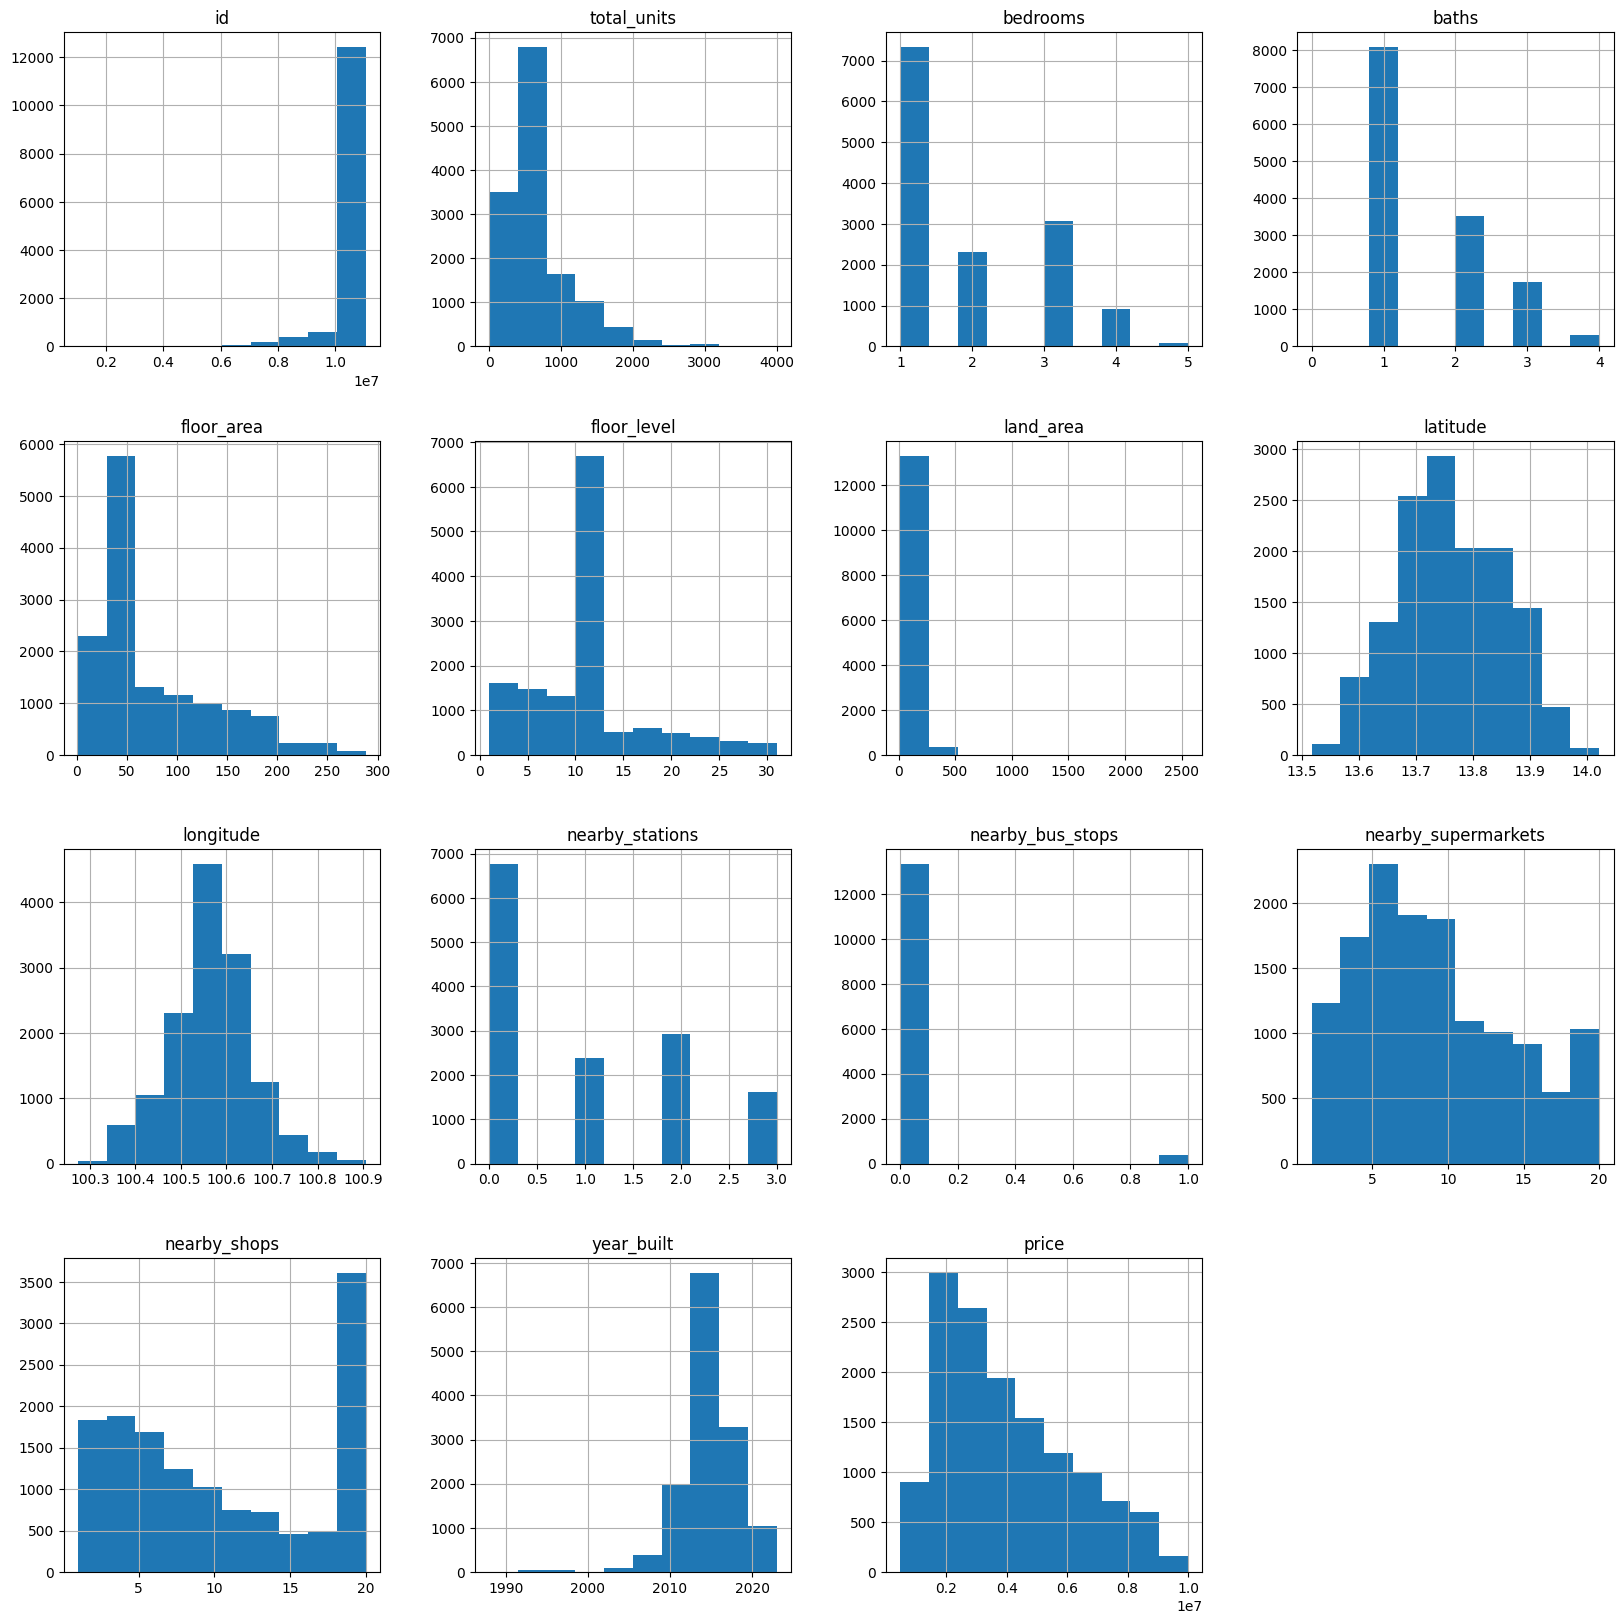

In [80]:
train_df.hist(figsize=(20, 20));

#### Scatter plot

<Axes: xlabel='floor_area', ylabel='price'>

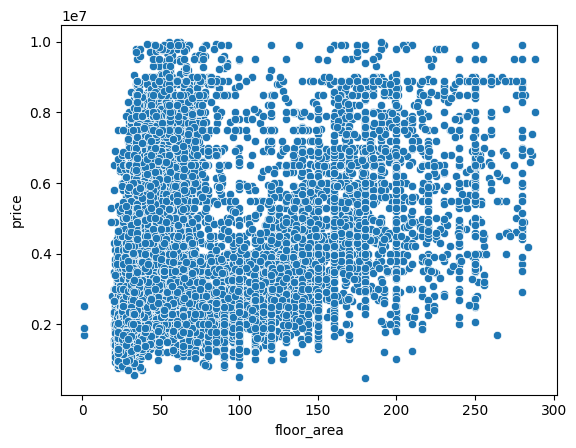

In [81]:
sns.scatterplot(x='floor_area', y='price', data=train_df)

# The scatter plot graph shows the relationship between floor_area and price.
# The price is increasing when floor_area is increasing.

<Axes: xlabel='floor_level', ylabel='price'>

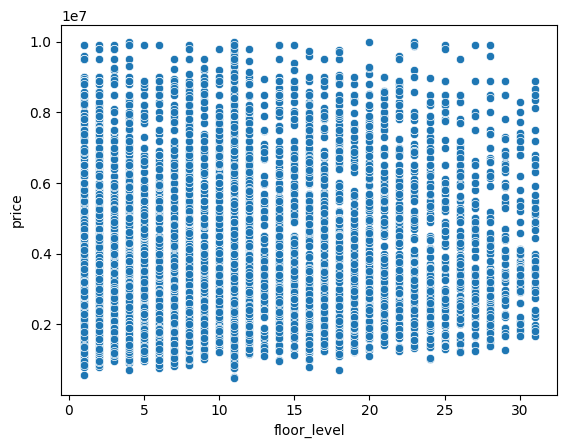

In [82]:
sns.scatterplot(x='floor_level', y='price', data=train_df)

# The scatter plot graph shows the relationship between floor_level and price.

In [83]:
# save the cleaned data
train_df.to_csv('../data/lasso_train_cleaned.csv', index=False)
test_df.to_csv('../data/lasso_test_cleaned.csv', index=False)

# Go to Modeling Notebook